In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from tabulate import tabulate    

In [2]:
# loading the data
df = pd.read_excel("Automobile_company data1.xlsx")
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Unnamed: 13,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,NaN,9 Oakridge Court,3216.0,VIC,Australia,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,NaN,57042 Village Green Point,4511.0,QLD,Australia,6.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,NaN,87 Crescent Oaks Alley,2756.0,NSW,Australia,10.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaN,8194 Lien Street,4032.0,QLD,Australia,7.0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,NaN,320 Acker Drive,2251.0,NSW,Australia,7.0


In [3]:
df_trans = pd.read_excel('Automobile_company data1.xlsx', sheet_name=2)
df_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
# merging the data from two different file
df = df.set_index('customer_id').join(df_trans.set_index('customer_id'), on='customer_id', how='inner')
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0
3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,...,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0


In [5]:
# Finding the shape of the data set
df.shape

(19997, 30)

In [6]:
df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'Unnamed: 13', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [7]:
# identifying the null values
df.isnull().sum()

first_name                                 0
last_name                                642
gender                                     0
past_3_years_bike_related_purchases        0
DOB                                      446
job_title                               2394
job_industry_category                   3229
wealth_segment                             0
deceased_indicator                         0
default                                 1451
owns_car                                   0
tenure                                   446
Unnamed: 13                            19997
address                                    0
postcode                                   0
state                                      0
country                                    0
property_valuation                         0
transaction_id                             0
product_id                                 0
transaction_date                           0
online_order                             360
order_stat

In [8]:
df['job_title'].mode()

0    Social Worker
Name: job_title, dtype: object

In [9]:
df['job_title'] = df['job_title'].fillna('Business Systems Development Analyst')

In [10]:
df['last_name'].mode()

0    Gladman
Name: last_name, dtype: object

In [11]:
df['last_name'] = df['last_name'].fillna('Pristnor')

In [12]:
df['job_industry_category'].mode()

0    Manufacturing
Name: job_industry_category, dtype: object

In [13]:
df['job_industry_category'] = df['job_industry_category'].fillna('Manufacturing')

In [14]:
df['default'].mode()

0    -1
Name: default, dtype: object

In [15]:
df['default'] = df['default'].fillna('100')

In [16]:
df['tenure'] = df['tenure'].fillna(df['tenure'].mean())

In [17]:
df = df.drop(['Unnamed: 13'], axis = 1)

In [18]:
a = df.select_dtypes(exclude = 'object')
b = df.select_dtypes(include = 'object')
alist = list(a.columns)
blist = list(b.columns)
print(tabulate({"Categorical":blist,
                "continuous": alist}, headers = ["categorical", "continuous"]))

categorical            continuous
---------------------  -----------------------------------
first_name             past_3_years_bike_related_purchases
last_name              DOB
gender                 tenure
job_title              postcode
job_industry_category  property_valuation
wealth_segment         transaction_id
deceased_indicator     product_id
default                transaction_date
owns_car               online_order
address                list_price
state                  standard_cost
country                product_first_sold_date
order_status
brand
product_line
product_class
product_size


In [19]:
df.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                  0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                           360
order_status                             0
brand                                  197
product_lin

In [20]:
df['job_title']

customer_id
1                        Executive Secretary
1                        Executive Secretary
1                        Executive Secretary
1                        Executive Secretary
1                        Executive Secretary
                        ...                 
3500    Business Systems Development Analyst
3500    Business Systems Development Analyst
3500    Business Systems Development Analyst
3500    Business Systems Development Analyst
3500    Business Systems Development Analyst
Name: job_title, Length: 19997, dtype: object

In [21]:
# Finding the age using there date of birth
from datetime import datetime
df['DOB'] = pd.to_datetime(df['DOB'])
current_date = datetime.now()
df['Age'] = (current_date - df['DOB']).astype('<m8[Y]')

In [22]:
df.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                  0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                           360
order_status                             0
brand                                  197
product_lin

In [23]:
df = df[df['Age'] < 80]

In [24]:
df.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                  0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                           352
order_status                             0
brand                                  188
product_lin

In [25]:
df['address'].mode()

0    3 Talisman Place
Name: address, dtype: object

In [26]:
df['address'] = df['address'].fillna('3 Mariners Cove Terrace')

In [27]:
df['postcode'].mode()

0    2170.0
Name: postcode, dtype: float64

In [28]:
df['postcode'] = df['postcode'].fillna('2170')

In [29]:
df['state'].mode()

0    NSW
Name: state, dtype: object

In [30]:
df['state'] = df['state'].fillna('NSW')

In [31]:
df['country'].mode()

0    Australia
Name: country, dtype: object

In [32]:
df['country'] = df['country'].fillna('Australia')

In [33]:
df['property_valuation'].mode()

0    9.0
Name: property_valuation, dtype: float64

In [34]:
df['property_valuation'] = df['property_valuation'].fillna(8.0)

In [35]:
df.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                  0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                           352
order_status                             0
brand                                  188
product_lin

In [36]:
df['job_title'].value_counts()

Business Systems Development Analyst    2560
Social Worker                            219
Legal Assistant                          205
Nuclear Power Engineer                   205
Internal Auditor                         203
                                        ... 
Automation Specialist IV                  15
Health Coach III                          14
Geologist II                              11
Research Assistant III                     9
Developer I                                7
Name: job_title, Length: 195, dtype: int64

In [37]:
df.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                  0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                           352
order_status                             0
brand                                  188
product_lin

In [38]:
df['brand'].mode()

0    Solex
Name: brand, dtype: object

In [39]:
df['product_line'] = df['product_line'].fillna('Standard')

In [40]:
df['product_class'] = df['product_class'].fillna('medium')

In [41]:
df['product_size'] = df['product_size'].fillna('medium')

In [42]:
df['brand'] = df['brand'].fillna('Solex')

In [43]:
df['standard_cost'] = df['standard_cost'].fillna(df['standard_cost'].mean())

In [44]:
df['product_first_sold_date'] = df['product_first_sold_date'].fillna(df['product_first_sold_date'].mean())

In [45]:
df['online_order'] = df['online_order'].fillna(df['online_order'].mean())

In [46]:
df.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [47]:
gender_mapping = {
    'F': 'Female',
    'Femal': 'Female',
    'M': 'Male',
    'Male': 'Male'
}


In [48]:
df['gender'] = df['gender'].replace(gender_mapping)

In [49]:
df['gender'].value_counts()

Female    10003
Male       9521
Name: gender, dtype: int64

In [50]:
# df = df[(df['gender'] == 'Male') & (df['gender'] == 'Female')]

In [51]:
# Univariate Analysis

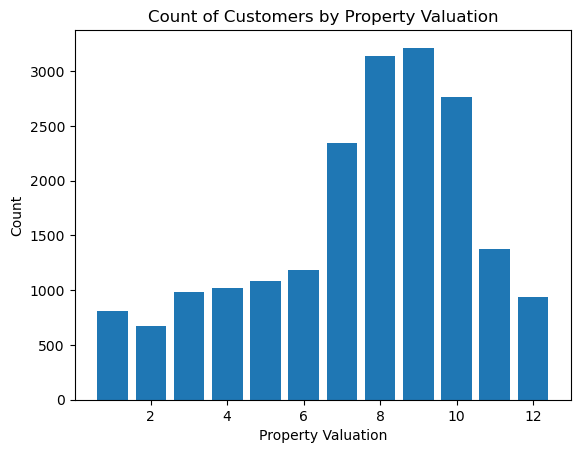

In [53]:
property_valuation_counts = df['property_valuation'].value_counts().sort_index()

plt.bar(property_valuation_counts.index, property_valuation_counts.values)
plt.title('Count of Customers by Property Valuation')
plt.xlabel('Property Valuation')
plt.ylabel('Count')
plt.show()

The majority of customers fall(11,000) within the property valuation range of 7-10, indicating that a significant proportion of the customer base possesses properties with this valuation range. This suggests that the automobile company's target customers typically have properties with moderate to high valuations.

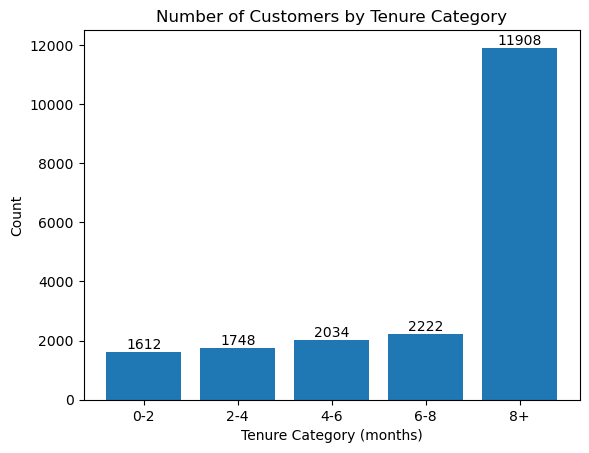

In [54]:
# Create tenure categories
df['tenure_category'] = pd.cut(df['tenure'], bins=[0, 2, 4, 6, 8, np.inf], labels=['0-2', '2-4', '4-6', '6-8', '8+'])

# Count the number of customers in each tenure category
tenure_counts = df['tenure_category'].value_counts().sort_index()

# Plot the tenure counts
plt.bar(tenure_counts.index, tenure_counts.values)
plt.title('Number of Customers by Tenure Category')
plt.xlabel('Tenure Category (months)')
plt.ylabel('Count')

# Annotate the count values on top of the bars
for i, count in enumerate(tenure_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


Nearly 11908 customers are maintaining the good realationship with the comapany for more than 8 years.2222 are with the company from past 6-8 years.

Overall, the presence of a significant number of customers maintaining relationships of more than 8 years, along with the mid-term customer segment, demonstrates the company's ability to foster customer loyalty and build lasting connections. It highlights the success of the company's strategies in creating a positive customer experience, which can serve as a foundation for future growth and business success.

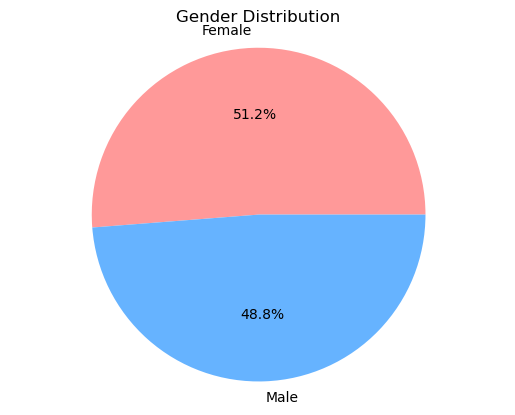

In [58]:
# Gender distribution
gender_counts = df['gender'].value_counts()
labels = gender_counts.index
counts = gender_counts.values

# Define custom colors
colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')

# Set aspect ratio to be equal so that the pie chart appears as a circle
plt.axis('equal')

plt.show()


In [ ]:
The given dataset contains 51.2% females and 48.8% males.

In [59]:
df['gender'].value_counts()

Female    10003
Male       9521
Name: gender, dtype: int64

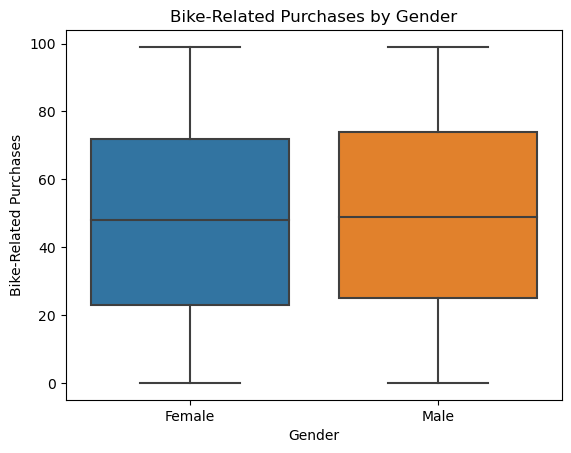

In [60]:
# Bike-related purchases
sns.boxplot(x='gender', y='past_3_years_bike_related_purchases', data=df)
plt.title('Bike-Related Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Bike-Related Purchases')
plt.show()


 The box plot analysis can help the automobile company tailor its marketing and sales strategies based on gender-specific bike purchasing behavior. Understanding the variations in purchasing patterns between genders allows the company to develop targeted campaigns, promotions, or product offerings that cater to the preferences and needs of different gender segments.

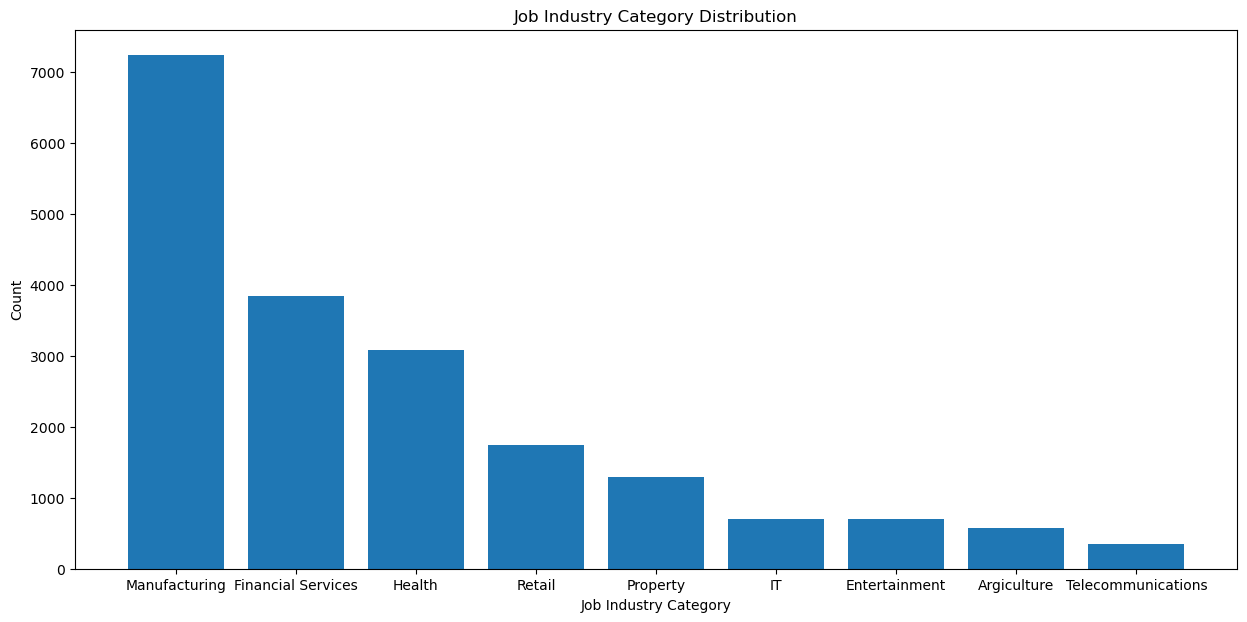

In [80]:

# # Job industry category
plt.figure(figsize = (15,7))
job_counts = df['job_industry_category'].value_counts()
plt.bar(job_counts.index, job_counts.values)
plt.title('Job Industry Category Distribution')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
# plt.xticks(rotation=90)
plt.show()

Majority nearly 45% of the customers are belongs to the manufacturing jon industry, followed by 20% of the customers belongs to the Financial services Industry.Very less number of customers belongs to the agriculture as well as Telecommunicationa department.

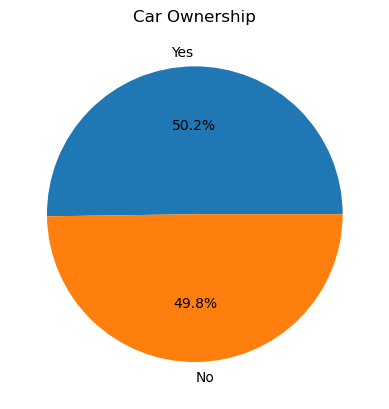

In [107]:
 # Car ownership
car_counts = df['owns_car'].value_counts()
plt.pie(car_counts, labels=car_counts.index, autopct='%1.1f%%')
plt.title('Car Ownership')
plt.show()

the interpretation of the finding that 50.2% of the customers have a car while the remaining 49.*% do not have a car highlights market potential, opportunities for targeting non-car owners, customer segmentation possibilities, market share assessment, insights into customer lifetime value, and understanding market trends and preferences. These insights can guide the company in optimizing its marketing strategies, product offerings, and overall business decisions.

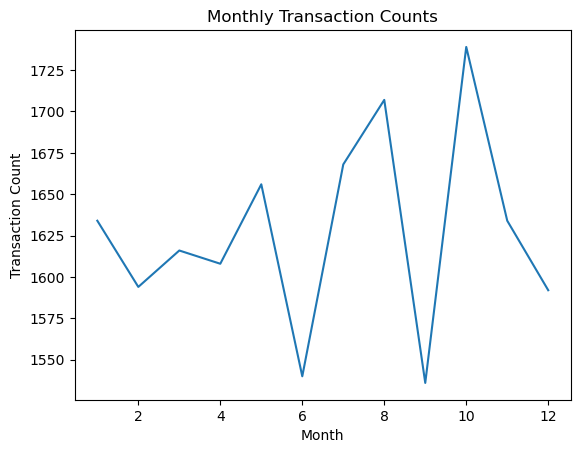

In [108]:
# Transaction date distribution
df['transaction_month'] = df['transaction_date'].dt.month
transaction_counts = df['transaction_month'].value_counts().sort_index()
plt.plot(transaction_counts.index, transaction_counts.values)
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

Above chart shows that high number of transactions from 6 to 8th month also from 9th to 10th month.Indicates the peak buying period.we can consider 6,7,8,10 th month are Periods of growth.

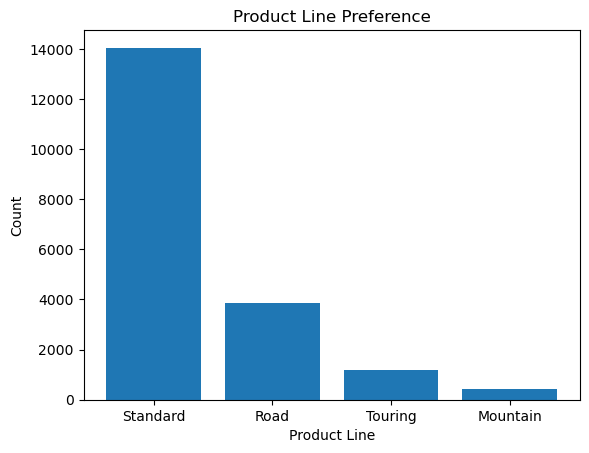

In [68]:
# Product line preference
product_line_counts = df['product_line'].value_counts()
plt.bar(product_line_counts.index, product_line_counts.values)
plt.title('Product Line Preference')
plt.xlabel('Product Line')
plt.ylabel('Count')
# plt.xticks(rotation=90)
plt.show()

the interpretation of nearly 14,000 customers out of 20,000 choosing the standard product line suggests its popularity, market demand.The popularity of the standard product line indicates a strong customer preference for these products.

In [65]:
# Calculate churn rate
df['churn'] = df['tenure'].apply(lambda x: 1 if x < 12 else 0)  # Define churn based on tenure threshold

# Analyze churn rate
churn_rate = df['churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 54.76%


In [66]:
# Bivariate Analysis

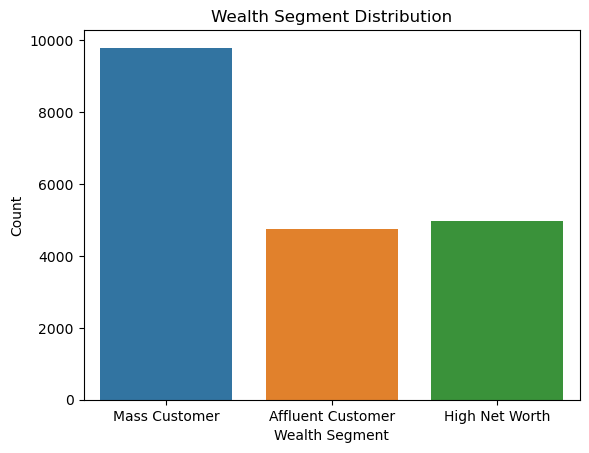

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of customers in each wealth segment
wealth_segment_counts = df['wealth_segment'].value_counts()

# Plot the wealth segment counts
sns.countplot(data=df, x='wealth_segment')
plt.title('Wealth Segment Distribution')
plt.xlabel('Wealth Segment')
plt.ylabel('Count')
plt.show()


nearly 50% of the customers belong to the "mass customers" category in the wealth segment, it suggests that the majority of the customer base represents a broad and diverse group with varying levels of wealth

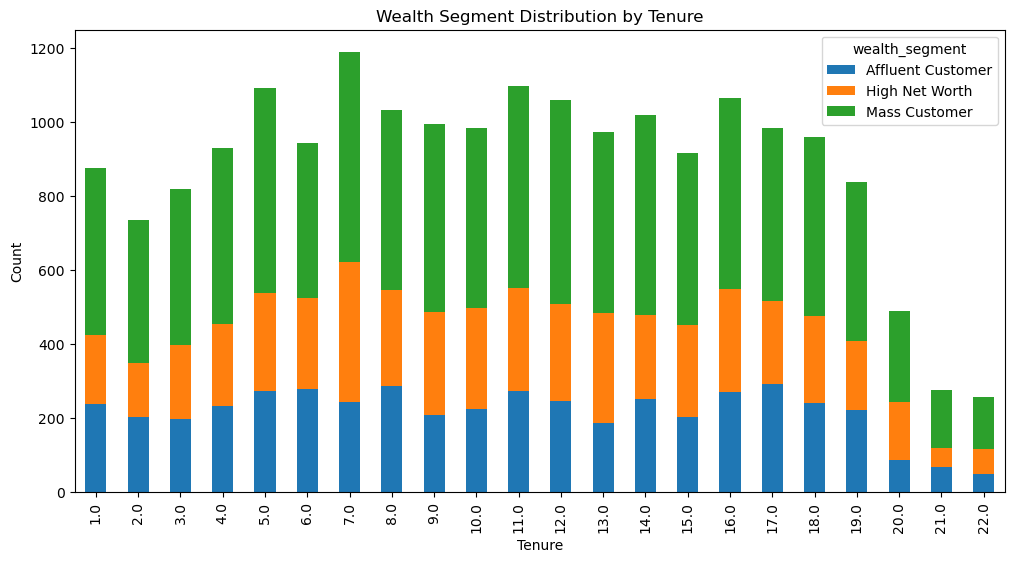

In [77]:
wealth_segment_counts = df.groupby(['tenure', 'wealth_segment']).size().unstack()
wealth_segment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Wealth Segment Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

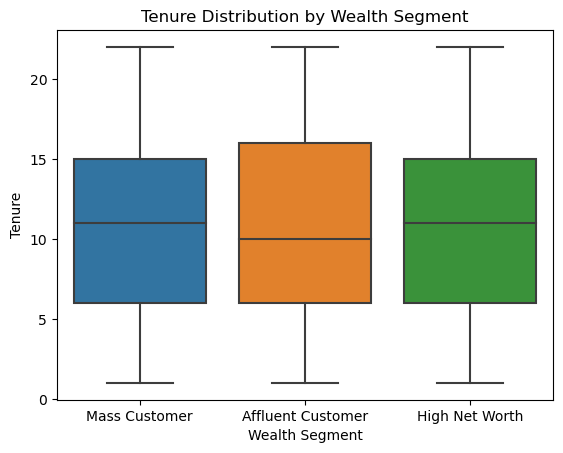

In [78]:
sns.boxplot(data=df, x='wealth_segment', y='tenure')
plt.title('Tenure Distribution by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Tenure')
plt.show()

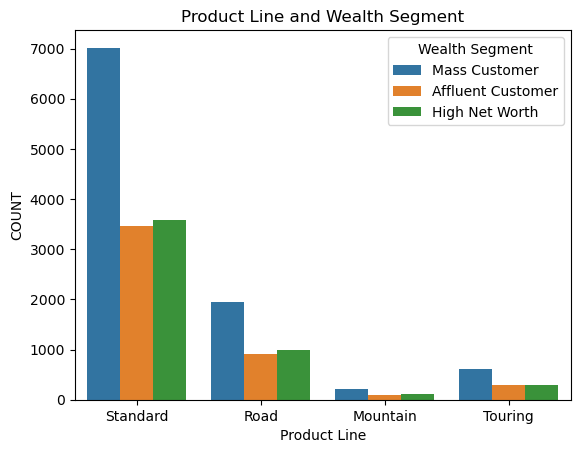

In [82]:
sns.countplot(x='product_line', hue ='wealth_segment', data=df)
plt.title('Product Line and Wealth Segment')
plt.xlabel('Product Line')
plt.ylabel('COUNT')
plt.legend(title='Wealth Segment')
plt.show()

In [ ]:
More than 70% of the custoomers are choosing the standard product line, amongh them more than 50% are mass customers means they are belongs to the broad group.

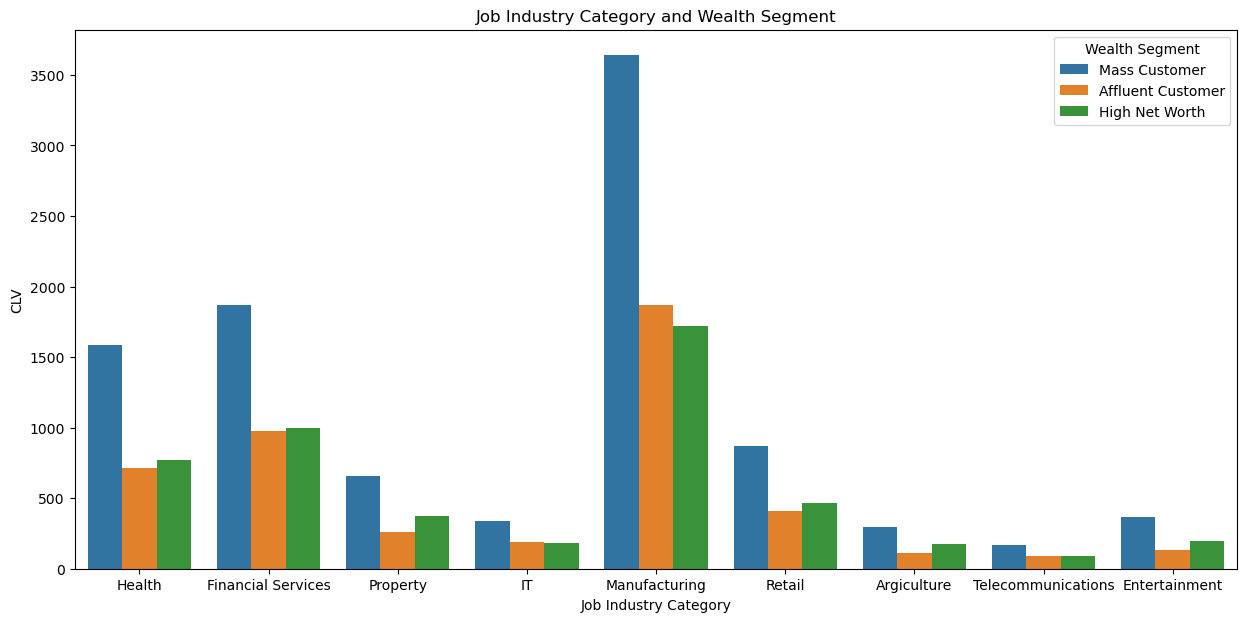

In [84]:
plt.figure(figsize = (15,7))
sns.countplot(x='job_industry_category', hue='wealth_segment', data=df)
plt.title('Job Industry Category and Wealth Segment')
plt.xlabel('Job Industry Category')
plt.ylabel('CLV')
plt.legend(title='Wealth Segment')
# plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

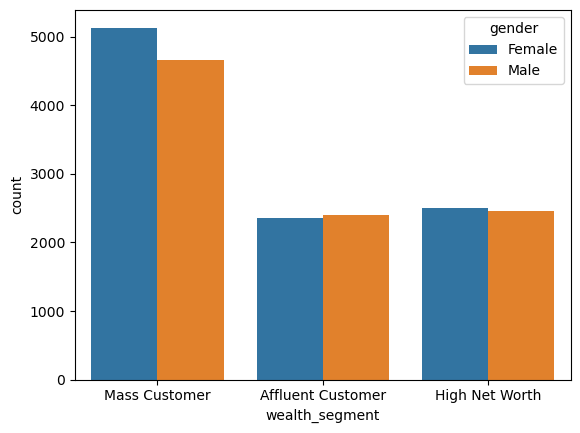

In [87]:
sns.countplot(x='wealth_segment', hue='gender', data=df_selected)

Most of the Mass customers are having the tenure between the 6 to 15 years and Affluent customers are having the tenure between the 7 to 17years .High net worth   customers are having relationship between 7 to 15 years.


# Multivariate Analysis

In [91]:
df_wealth = df[(df.wealth_segment) == 'Mass Customer']
df_wealth

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,...,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,tenure_category,transaction_month,churn
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,Standard,medium,medium,235.63,125.07,38482.0,None,8+,12,1
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,Standard,medium,medium,1577.53,826.51,39526.0,None,8+,4,1
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,Road,low,small,1720.70,1531.42,37823.0,None,8+,5,1
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,Standard,medium,medium,360.40,270.30,37873.0,None,8+,1,1
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,Standard,medium,medium,71.49,53.62,38573.0,None,8+,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Business Systems Development Analyst,Manufacturing,Mass Customer,N,á,...,Standard,medium,medium,478.16,298.72,36146.0,None,6-8,1,1
3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Business Systems Development Analyst,Manufacturing,Mass Customer,N,á,...,Standard,medium,medium,1403.50,954.82,41245.0,None,6-8,6,1
3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Business Systems Development Analyst,Manufacturing,Mass Customer,N,á,...,Touring,medium,large,1890.39,260.14,34143.0,None,6-8,3,1


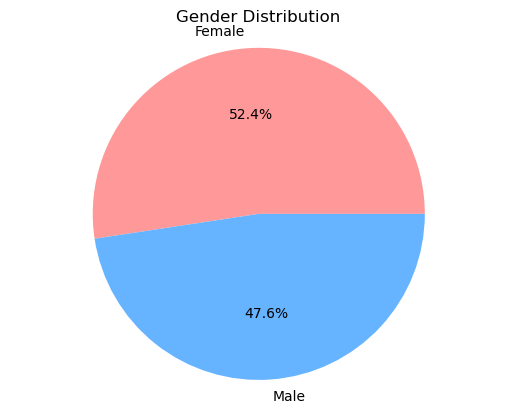

In [92]:
gender_counts = df_wealth['gender'].value_counts()
labels = gender_counts.index
counts = gender_counts.values

# Define custom colors
colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')

# Set aspect ratio to be equal so that the pie chart appears as a circle
plt.axis('equal')

plt.show()

The given dataset contains 52.4% females and 47.6% males

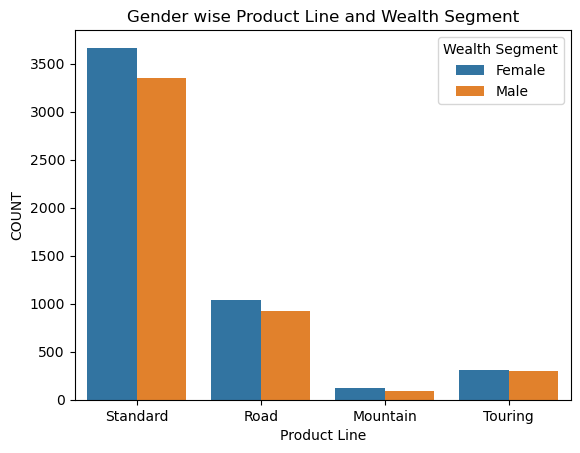

In [102]:
sns.countplot(x='product_line', hue ='gender', data=df_wealth)
plt.title('Gender wise Product Line and Wealth Segment')
plt.xlabel('Product Line')
plt.ylabel('COUNT')
plt.legend(title='Wealth Segment')
plt.show()

More than 40% of the customers are working in the Manufacturing industry, followed by 20% are working at the Financial service Industry.


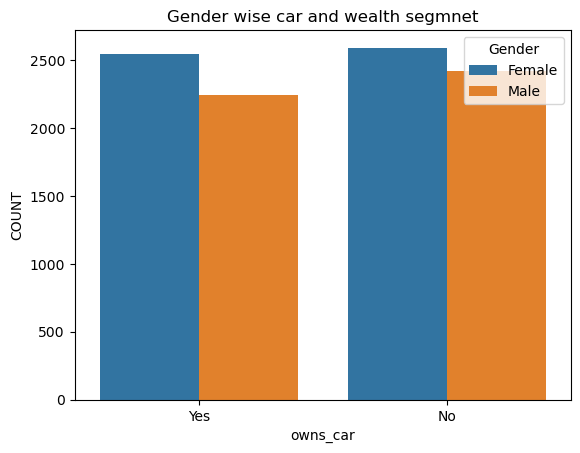

In [105]:
sns.countplot(x='owns_car', hue ='gender', data=df_wealth)
plt.title('Gender wise car and wealth segmnet')
plt.xlabel('owns_car')
plt.ylabel('COUNT')
plt.legend(title='Gender')
plt.show()

Among the mass customer wealth segment customer 50% of them are having the cars and 50% of them doesn’t have car .Most of the female customers are having the cars.


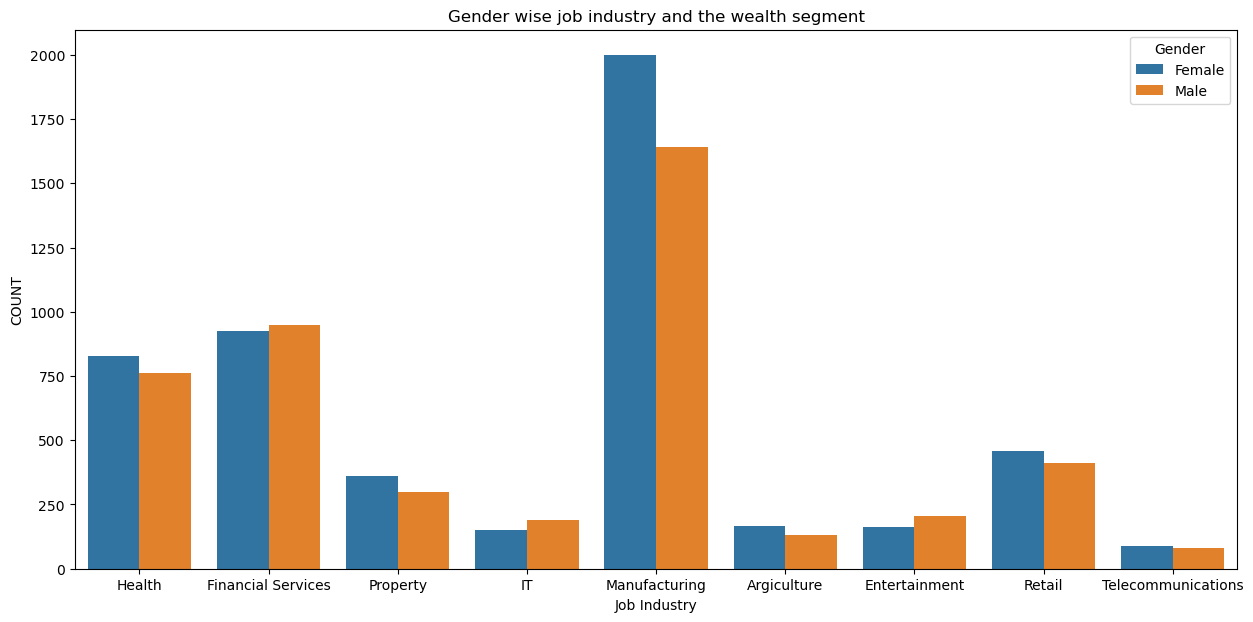

In [100]:
plt.figure(figsize = (15,7))
sns.countplot(x='job_industry_category', hue ='gender', data=df_wealth)
plt.title('Gender wise job industry and the wealth segment')
plt.xlabel('Job Industry')
plt.ylabel('COUNT')
plt.legend(title='Gender')
plt.show()

More than 50% of the female customers maintain between 9 to 12 years of relationship with the company.
Male customers are mostly maintaining the relation of 5 to years.

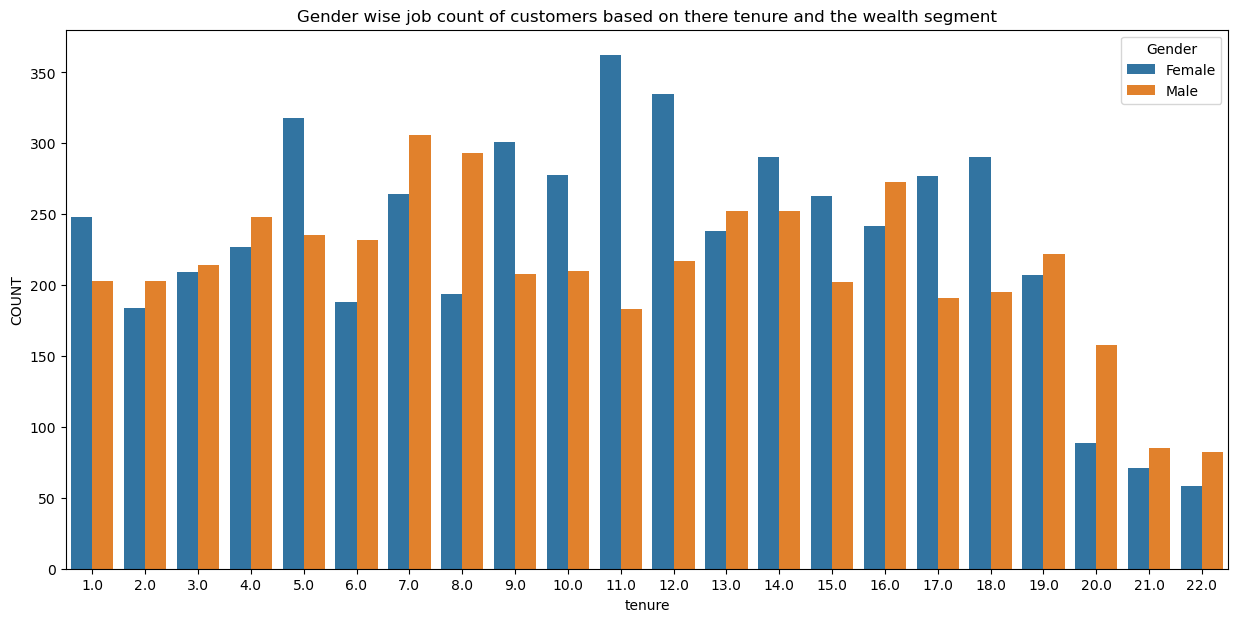

In [109]:
plt.figure(figsize = (15,7))
sns.countplot(x='tenure', hue ='gender', data=df_wealth)
plt.title('Gender wise job count of customers based on there tenure and the wealth segment')
plt.xlabel('tenure')
plt.ylabel('COUNT')
plt.legend(title='Gender')
plt.show()

More than 50% of the female customers maintain between 9 to 12 years of relationship with the company.
Male customers are mostly maintaining the relation of 5 to years.


By following this approach, we will be able to identify customer trends and behavior to help Automobile company to  drive more value for their organization. 

In order to optimize the business company should focus on the key customers belongs to the Mass customer wealth segment. Since the number female customers are more than the male customers they have to research reason why male customers are preferring there company.

Nearly 60% of the customers are maintain  more than 8+ years of relationship with company.
More than 50% of the customers belongs to the Manufacturing job industry.

50.2% of the customers have a car while the remaining 49.8% do not have a car highlights market potential, opportunities for targeting non-car owners, customer segmentation possibilities, market share assessment, insights into customer lifetime value, and understanding market trends and preferences. These insights can guide the company in optimizing its marketing strategies, product offerings, and overall business decisions.

The interpretation of nearly 14,000 customers out of 20,000 choosing the standard product line suggests its popularity, market demand. The popularity of the standard product line indicates a strong customer preference for these products.


In [110]:
# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

In [117]:
import pandas as pd 
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [122]:
hostname="localhost"
dbname="Customer_information" # Name of the database into which we want into insert the data 
uname="root"
pwd="Darshu12345"


# Create SQLAlchemy engine to connect to MySQL Database

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [123]:
df = pd.read_csv("output.csv")
df.to_sql("Customer_information",engine,index=False)

19524